In [1]:
import os
import numpy as np
import re
import matplotlib.pyplot as plt
import random

In [2]:
# input files 
file_1 = r'\\ait-pdfs.win.dtu.dk\users\homedir\taba\Documents\Experiment design\Danish sentences\VISL Sentences - Study1\FromWebsite_reducedSentenceLength_åReplacedaa\BegynderNiveau.txt'
file_2 = r'\\ait-pdfs.win.dtu.dk\users\homedir\taba\Documents\Experiment design\Danish sentences\VISL Sentences - Study1\FromWebsite_reducedSentenceLength_åReplacedaa\Fortsætterniveau.txt'

resultPath = r'\\ait-pdfs.win.dtu.dk\users\homedir\taba\Documents\Experiment design\Danish sentences\VISL Sentences - Study1\Analyzed\Danish'


In [3]:
# open the file and save sentences in form of list
with open(file_1, 'r') as f1:
    file_1_list = f1.read().splitlines()
    
with open(file_2, 'r') as f2:
    file_2_list = f2.read().splitlines()

In [4]:
# function that computes LIX score 
def ComputeLIXscoreOfPhrase(phrase):
    
    
    B = 1
    sentenceLength = phrase.count(' ')
    words = phrase.split()
    A = sentenceLength
    C = 0
    for word in words:
        if len(word) > 6:
            C = C + 1
        
    LIX = A/B + (C*100)/A
            
#     if LIX < 35:
#         print('Easy')
#     elif LIX > 45:
#         print('Difficult')
#     else:
#         print('Medium')
    
    return LIX

In [5]:
LIXDifficultList = list()
LIXDifficultScores = list()
LIXEasyList = list()
LIXEasyScores = list() 
LIXMediumList = list()
LIXMediumScores = list()

for sentence in file_1_list:
    #print(sentence)
    
    # for lix score, numbers, symbols are considered as spaces
    print(sentence)
    # replace numbers and commas with spaces
    sentenceForLix = re.sub('[",:;()/\-?!.]', " ", sentence)
    sentenceForLix = re.sub("[0-9]+.?[0-9]*", " ", sentence)
    
    print(sentenceForLix)
    # compute LIX score
    LIX = ComputeLIXscoreOfPhrase(sentenceForLix)
    
    # Categorize sentence depending on LIX score
    if LIX > 60:
        LIXDifficultScores.append(LIX)
        LIXDifficultList.append(sentence)
    elif LIX < 30:
        LIXEasyScores.append(LIX)
        LIXEasyList.append(sentence)
    elif LIX > 40 and LIX < 50:
        LIXMediumScores.append(LIX)
        LIXMediumList.append(sentence)
        
        
print('Difficult: ', len(LIXDifficultList))
print('Medium: ', len(LIXMediumList))
print('Easy: ', len(LIXEasyList))

Signe spiser et æble.
Birger drikker kaffe.
Moderen henter barnet i børnehaven.
Kom hurtigt og nemt på internettet.
Denne værdikupon dækker kun den angivne periode.
I går løb Birger hele vejen til universitetet.
De studerende spiste deres mad i det grønne på grund af det gode vejr.
Afgiften fremgår af fakturaen fra gasleverandøren.
Signe læser på Odense Universitet.
Birger er studerende ved Odense Universitet.
Underviseren lå i sengen hele vinterferien.
Sygeplejersken læste om undersøgelsen i sit fagblad.
Mange studerende bor på kollegium.
Underviseren boede på HCø.
Signe vil læse dagens nyheder på Internet.
Birger skal søge efter mere litteratur på biblioteket.
Du har nu fået besked på skærmen om funktioner og former.
De studerende havde efter anbefaling af deres underviser gennem flere semestre forberedt sig grundigt til den skriftlige eksamen.
Vi har cyklet længe.
Nu sidder vi i grøftekanten og nyder solen.
På det tidspunkt vil bagtroppen også have indhentet os.
Vi havde cyklet læng

In [68]:
for sentence in file_2_list:
    #print(sentence)
        
    # replace numbers and commas with spaces
    sentenceForLix = re.sub('[",:;()/\-?!.]', " ", sentence)
    sentenceForLix = re.sub("[0-9]+.?[0-9]*", " ", sentence)
    
    # compute LIX score
    LIX = ComputeLIXscoreOfPhrase(sentenceForLix)
    
    if LIX > 60:
        LIXDifficultScores.append(LIX)
        LIXDifficultList.append(sentence)
    elif LIX < 30: 
        LIXEasyScores.append(LIX)
        LIXEasyList.append(sentence)
    elif LIX > 40 and LIX < 50:
        LIXMediumScores.append(LIX)
        LIXMediumList.append(sentence)
        
        
print('Difficult: ', len(set(LIXDifficultList)))
print('Medium: ', len(set(LIXMediumList)))
print('Easy: ', len(set(LIXEasyList)))

Difficult:  48
Medium:  56
Easy:  44


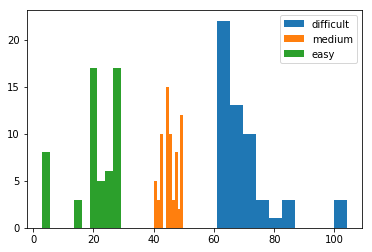

In [69]:
# visualize score distribution
plt.hist(LIXDifficultScores, label='difficult')
plt.hist(LIXMediumScores, label='medium')
plt.hist(LIXEasyScores, label='easy')
plt.legend()

In [70]:

with open(resultPath + '\\' + 'difficult.txt', "w+", encoding='utf-8')  as file:    
    if LIXDifficultList:
        LIXDifficultList = set(LIXDifficultList)
        file.write("\n".join(LIXDifficultList))
    
with open(resultPath + '\\' + 'medium.txt', "w+", encoding='utf-8')  as file:
    if LIXMediumList:
        LIXMediumList = set(LIXMediumList)
        file.write("\n".join(LIXMediumList))
    
with open(resultPath + '\\' + 'easy.txt', "w+", encoding='utf-8') as file:
    if LIXEasyList:
        LIXEasyList = set(LIXEasyList)
        file.write("\n".join(LIXEasyList))
    

In [77]:
# Currently, the number of sentences in each category of complexity are 55,68,56. If 4 parts are created, they are 
# more or less equally distributed. 1 sentence will be removed from each part, to form two sets of trial sentences.  
# This part of code will take the 4 numbers 1-4, and create a combination of easy, medium and difficult sentences.

nParticipants = 6
combination1category  = 0
combiList = list()

for i in range(20):
    combination1category = str(random.randint(1,4)) + str(random.randint(1,4)) + str(random.randint(1,4)) 
    #print(combination1category)
    combiList.append(combination1category)
    
print(set(combiList))

# {'221', '341', '222', '323', '124', '143', '243', '311', '244', '121', '441', '211', '223', '344', '111', 
# '421', '331', '423', '342', '132'}


{'221', '341', '222', '323', '124', '143', '243', '311', '244', '121', '441', '211', '223', '344', '111', '421', '331', '423', '342', '132'}


In [9]:
# part is a variable that determines the part of the category to be taken, for the participant
part = {'easy' : 4}
part['medium'] =  4
part['difficult'] = 1
nPhrases = 5

participant = 'Björgvin_2'


infilePath = r'\\ait-pdfs.win.dtu.dk\users\homedir\taba\Documents\Experiment design\Danish sentences\VISL Sentences - Study1\Analyzed\Danish\Parts'
outfilePath = r'\\ait-pdfs.win.dtu.dk\users\homedir\taba\Documents\Experiment design\Pilot expt for movement\Phrases'

fileEasy = 'easy' + str(part['easy']) + '.txt'
fileMedium = 'medium' + str(part['medium']) + '.txt'
fileDifficult = 'difficult' + str(part['difficult']) + '.txt'
    
# open file and choose 5 sentences randomly
with open(infilePath + '\\' + fileEasy, 'r', encoding='utf-8') as f_easy:
    phrases_easy_all = f_easy.read().splitlines()

with open(infilePath + '\\' + fileMedium, 'r', encoding='utf-8') as f_medium:
    phrases_medium_all = f_medium.read().splitlines()

with open(infilePath + '\\' + fileDifficult, 'r', encoding='utf-8') as f_difficult:
    phrases_difficult_all = f_difficult.read().splitlines()

# choose nPhrases number of random sentences from each category
phrases_easy_some = random.sample(phrases_easy_all, nPhrases)
phrases_medium_some = random.sample(phrases_medium_all, nPhrases)
phrases_difficult_some = random.sample(phrases_difficult_all, nPhrases)

phrasesFinal = phrases_easy_some + phrases_medium_some + phrases_difficult_some

# write the phrases in a text file 
with open(outfilePath + '\\' + participant + '.txt', 'w+', encoding='utf-8') as f_out:
    f_out.write('\n'.join(phrasesFinal))
